# Fundamentals of Programming for Business Applications (BUST08039) - Hotel Bookings analysis - Individual Assessment

In [2]:
# 1. Import 2 Libraries; Pandas & Matplotlib

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [5]:
#2. Load CSV file using relative path

In [3]:
data = pd.read_csv('hotel_bookings.csv')

In [4]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119389,City Hotel,0.0,23.0,2017.0,August,35.0,30.0,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06/09/2017
119390,City Hotel,0.0,102.0,2017.0,August,35.0,31.0,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07/09/2017
119391,City Hotel,0.0,34.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07/09/2017
119392,City Hotel,0.0,109.0,2017.0,August,35.0,31.0,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [8]:
#3. Check if the data is a pandas DataFrame

In [5]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [10]:
#4. Display the DataFrame index and the column names

In [6]:
print("Index", data.index)
print("Columns", data.columns)

Index RangeIndex(start=0, stop=119394, step=1)
Columns Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [12]:
#5. Display the DataFrame shape and the total number of elements

In [7]:
print("Shape", data.shape)
print("Size", data.size)

Shape (119394, 32)
Size 3820608


In [14]:
#6. Display the data types of each column

In [8]:
print("Data Types:\n", data.dtypes)

Data Types:
 hotel                              object
is_canceled                       float64
lead_time                         float64
arrival_date_year                 float64
arrival_date_month                 object
arrival_date_week_number          float64
arrival_date_day_of_month         float64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                

In [16]:
#7. Remove bookings with 0 price or lead time > 500 days

In [9]:
data = data.loc[data['adr']> 0]
data = data.loc[data['lead_time']<= 500]

In [18]:
#8. Reset the index and rename the rows for clarity

In [10]:
data.index = [f'booking{i}' for i in range(1, len(data) + 1)]

In [20]:
#9. Creating a new column for when a guest received a room upgrade

In [11]:
data['got_upgrade'] = data['assigned_room_type'] != data['reserved_room_type']

In [22]:
#10. Calculate the mean upgrade frequency by customer type

In [12]:
upgrade_frequency = data.groupby('customer_type')['got_upgrade'].mean().sort_values(ascending = False)

In [24]:
#11. Bar graph of the room upgrade frequency by customer type with percentages

In [25]:
# Including the labels, annotations, gridlines and layout adjustments for the standalone bar graph

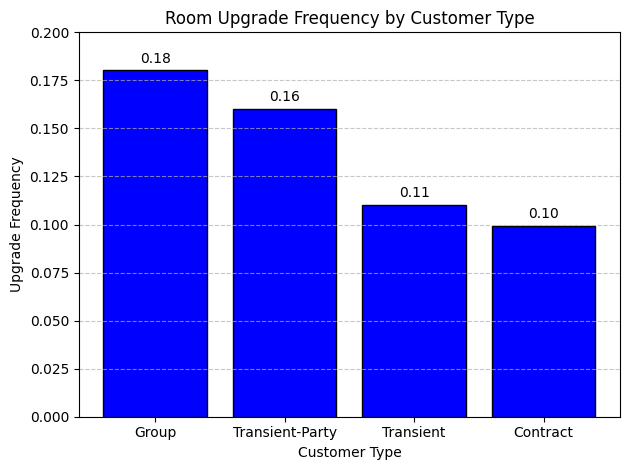

In [13]:
plt.bar(upgrade_frequency.index, upgrade_frequency.values, width=0.8 , color=('blue'), edgecolor='black')
plt.title("Room Upgrade Frequency by Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Upgrade Frequency")
plt.ylim(0,0.2)
for x, y in enumerate(upgrade_frequency.values):
    plt.text(x , y+0.004 ,f'{y:.2f}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

## Mini-report (199 words):

**Business Question:**
How does room upgrade frequency vary by customer type?
This report explores whether specific customers, such as Group, Transient-Party, Transient, or Contract, are more likely to receive room upgrades.

**Relevance:**
Analyzing upgrade frequency by customer type helps provide insights into whether the hotel’s upgrade policies are aligned with business goals. It allows managers to see if customers are being appropriately rewarded, helping them increase satisfaction, loyalty, and revenue.

**Data Justification:**
I used three key attributes in the data analysis: ‘customer_type’, ‘reserved_room_type’, and ‘assigned_room_type’. By comparing the reserved and assigned room types, I created a new column, ‘got_upgrade’, showing when an upgrade occurred. Grouping this data by ‘customer_type’ and calculating the mean provided straightforward upgrade frequency percentages.

**Findings and Insights:** 
The results revealed that Group and Transient-Party customers are most likely to receive upgrades, while Contract and Transient customers are upgraded less frequently. This indicates that the hotel prioritises larger bookings or leisure guests. The bar graph confirms this trend and shows a focus on high-volume groups. Management can use these findings to evaluate whether the current upgrade strategy favors their goals or if a more balanced upgrade allocation is wanted for balance and fairness.


- A) Very good for the business question and the answer. 68
- B) Very good for the use of data. 70
- C) Very good for the visualization. 65
- D) Very good for the code structure. 62

The business question is stated very clearly with solid analysis. The question and the analysis is also insightful.

The data is appropriately used with some own understanding. Why the chosen features are useful for the question is also explained.

The code structural is clear with comments.

In [14]:
import numpy as np

A, B, C, D = 68, 70, 65, 62

print('overall mark: ' + str(np.mean([A, B, C, D])))

overall mark: 66.25
